In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.datasets import load_iris

# Muat Iris dataset
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = pd.Series(iris.target) # Target (Species)

# Tampilkan 5 baris pertama X dan y
print("Fitur (X_iris) head:")
print(X_iris.head())
print("\nTarget (y_iris) head:")
print(y_iris.head())

# Tampilkan informasi singkat tentang dataset
print("\nInfo X_iris:")
print(X_iris.info())

Fitur (X_iris) head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y_iris) head:
0    0
1    0
2    0
3    0
4    0
dtype: int64

Info X_iris:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [3]:
from sklearn.model_selection import train_test_split

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris
)

print(f"Ukuran X_train_iris: {X_train_iris.shape}")
print(f"Ukuran X_test_iris: {X_test_iris.shape}")

Ukuran X_train_iris: (120, 4)
Ukuran X_test_iris: (30, 4)


In [4]:
from sklearn.naive_bayes import GaussianNB

# Membuat instance model Naive Bayes
model_nb_iris = GaussianNB()

# Melatih model menggunakan data latih
model_nb_iris.fit(X_train_iris, y_train_iris)


GaussianNB()

Akurasi Model Naive Bayes (Iris Dataset): 0.97

Classification Report (Iris Dataset):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix (Iris Dataset):
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


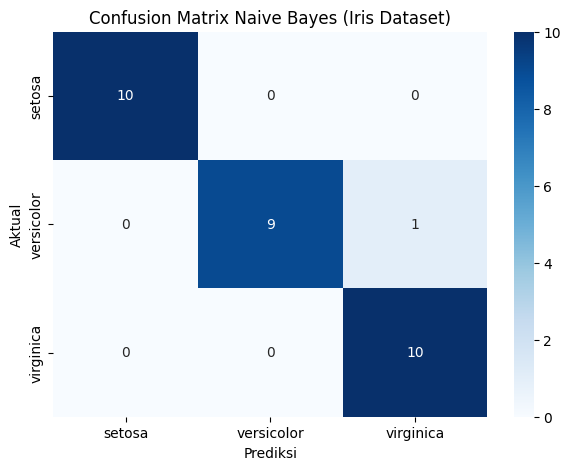

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Melakukan prediksi pada data uji
y_pred_iris = model_nb_iris.predict(X_test_iris)

# Menghitung Akurasi
akurasi_iris = accuracy_score(y_test_iris, y_pred_iris)
print(f"Akurasi Model Naive Bayes (Iris Dataset): {akurasi_iris:.2f}")

# Menampilkan Classification Report (Presisi, Recall, F1-Score)
print("\nClassification Report (Iris Dataset):")
print(classification_report(y_test_iris, y_pred_iris, target_names=iris.target_names))

# Menampilkan Confusion Matrix (matriks kebingungan)
cm_iris = confusion_matrix(y_test_iris, y_pred_iris)
print("\nConfusion Matrix (Iris Dataset):")
print(cm_iris)

# Visualisasi Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm_iris, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Naive Bayes (Iris Dataset)')
plt.show()

Bagian 2: Regresi